In [33]:
from backtest.Investment import Investment

import pandas as pd

import matplotlib.pyplot as plt

In [34]:
def get_benchmark_accumulated_return(benchmark, sym):

    benchmark['month'] = pd.to_datetime(benchmark['month'], format="%Y-%m-%d")

    benchmark = benchmark[benchmark["sym.2"] == sym]

    accumulated_percent = 1

    for i in range(len(benchmark)):

        accumulated_percent *= (benchmark.iloc[i]['returns.2']/100) + 1

        benchmark.at[benchmark.index[i], 'returns.2'] = (accumulated_percent - 1) * 100

    return benchmark

In [35]:
# ** THIS IS THE ONLY AREA YOU NEED TO CHANGE**

ticker = "BTC" # CHANGE THE CRYPTO YOU WANT TO TEST FROM EITHER OF THE FOLLOWING ("BTC", "ETH")

BTC_daily = pd.read_csv(ticker + '-USDT_daily.csv')

benchmark = pd.read_csv('benchmark.csv', index_col=0)

benchmark = get_benchmark_accumulated_return(benchmark=benchmark, sym=ticker)

In [36]:
strategy = Investment(file_name=BTC_daily, ticker = ticker + '/USDT')

In [37]:
strategy.daily_inside_candle_strategy_long_win_loss_ratio(cur_date="2017-08-17", end_date="2024-03-31", loss=0.03, ratio=1)

# strategy.daily_inside_candle_strategy_long_reference_loss(cur_date="2017-08-17", end_date="2024-03-31", num_of_bar=3)

# strategy.daily_inside_candle_strategy_long_ema_win_loss_ratio(cur_date="2017-08-17", end_date="2024-03-31", loss=0.03, ratio=1, ema=20)

# strategy.daily_inside_candle_strategy_long_ema_reference_loss(cur_date="2017-08-17", end_date="2024-03-31", ema=20)

In [38]:
strategy.stockAccount.get_strategy_info()

{'average_return_per_trade': -0.06891620502328741,
 'accumulated_return': -19.206316345449594,
 'win_ratio': 46.808510638297875,
 'max_win': 9.563267122645925,
 'max_loss': -12.308851872376882,
 'total_trade': 94}

In [39]:
strategy.stockAccount.get_transaction() # transactions

[{'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 8, 29, 0, 0),
  'price': 4353.65,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 8, 30, 0, 0),
  'price': 4564.52,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 9, 19, 0, 0),
  'price': 4060.0,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 9, 20, 0, 0),
  'price': 3910.04,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 9, 26, 0, 0),
  'price': 3928.0,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 9, 28, 0, 0),
  'price': 4192.11,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 10, 8, 0, 0),
  'price': 4425.0,
  'ls': True,
  'buy': True},
 {'ticker': 'BTC/USDT',
  'date': datetime.datetime(2017, 10, 9, 0, 0),
  'price': 4640.0,
  'ls': True,
  'buy': False},
 {'ticker': 'BTC/USDT',


In [40]:
def pls_visualize(pls):

    columns = ['ticker', 'buy_date', 'buy_price', 'sell_date', 'sell_price', 'ls', 'pl', 'pl_percent']
    df = pd.DataFrame(columns=columns)
    for i in pls:
        df.loc[len(df)] = [
            i['ticker'],
            i['buy_date'],
            i['buy_price'],
            i['sell_date'],
            i['sell_price'],
            i['ls'],
            i['pl'],
            i['pl_percent']
        ]

    return df

df_pls = pls_visualize(strategy.stockAccount.get_pls())
df_pls

,ticker,buy_date,buy_price,sell_date,sell_price,ls,pl,pl_percent
0,BTC/USDT,2017-08-29,4353.65,2017-08-30,4564.52,True,210.87,4.843522
1,BTC/USDT,2017-09-19,4060.00,2017-09-20,3910.04,True,-149.96,-3.693596
2,BTC/USDT,2017-09-26,3928.00,2017-09-28,4192.11,True,264.11,6.723778
3,BTC/USDT,2017-10-08,4425.00,2017-10-09,4640.00,True,215.00,4.858757
4,BTC/USDT,2017-10-30,6133.01,2017-11-01,6463.00,True,329.99,5.380555
...,...,...,...,...,...,...,...,...
89,BTC/USDT,2024-01-09,46951.04,2024-01-13,42782.74,True,-4168.30,-8.877972
90,BTC/USDT,2024-01-27,41823.51,2024-01-30,43302.71,True,1479.20,3.536767
91,BTC/USDT,2024-02-08,44349.60,2024-02-10,47132.78,True,2783.18,6.275547
92,BTC/USDT,2024-03-05,68245.71,2024-03-06,63724.01,True,-4521.70,-6.625618


In [41]:
accumulated_percent = 1
# accumulated_percent *= (i['pl_percent'] / 100) + 1
columns = ["date", "pl_percent"]
result = pd.DataFrame(columns=columns)
for i in range(len(df_pls)):
    accumulated_percent *= (df_pls.iloc[i]['pl_percent']/100) + 1
    row = [df_pls.iloc[i]['buy_date'], (accumulated_percent - 1) * 100]
    result.loc[len(result.index)] = row

result

,date,pl_percent
0,2017-08-29,4.843522
1,2017-09-19,0.971026
2,2017-09-26,7.760094
3,2017-10-08,12.995895
4,2017-10-30,19.075701
...,...,...
89,2024-01-09,-24.770237
90,2024-01-27,-22.109535
91,2024-02-08,-17.221483
92,2024-03-05,-22.706071


In [42]:
result.insert(2, ticker + "_return", [None for i in range(len(result))], True)

for i in range(len(result)):
    for j in range(len(benchmark)):
        # datetime.datetime.strptime()
        if result.iloc[i]['date'].year == benchmark.iloc[j]['month'].year and result.iloc[i]['date'].month == benchmark.iloc[j]['month'].month:
            result.at[result.index[i], ticker + '_return'] = benchmark.iloc[j]['returns.2'] * 100
            break
result  

,date,pl_percent,BTC_return
0,2017-08-29,4.843522,10.874391
1,2017-09-19,0.971026,4.227783
2,2017-09-26,7.760094,4.227783
3,2017-10-08,12.995895,51.855876
4,2017-10-30,19.075701,51.855876
...,...,...,...
89,2024-01-09,-24.770237,417.437093
90,2024-01-27,-22.109535,417.437093
91,2024-02-08,-17.221483,462.823111
92,2024-03-05,-22.706071,480.193581


([<matplotlib.axis.XTick at 0x7f9938524d00>,
 [Text(17532.0, 0, '2018-01-01'),
  Text(17897.0, 0, '2019-01-01'),
  Text(18262.0, 0, '2020-01-01'),
  Text(18628.0, 0, '2021-01-01'),
  Text(18993.0, 0, '2022-01-01'),
  Text(19358.0, 0, '2023-01-01'),
  Text(19723.0, 0, '2024-01-01')])

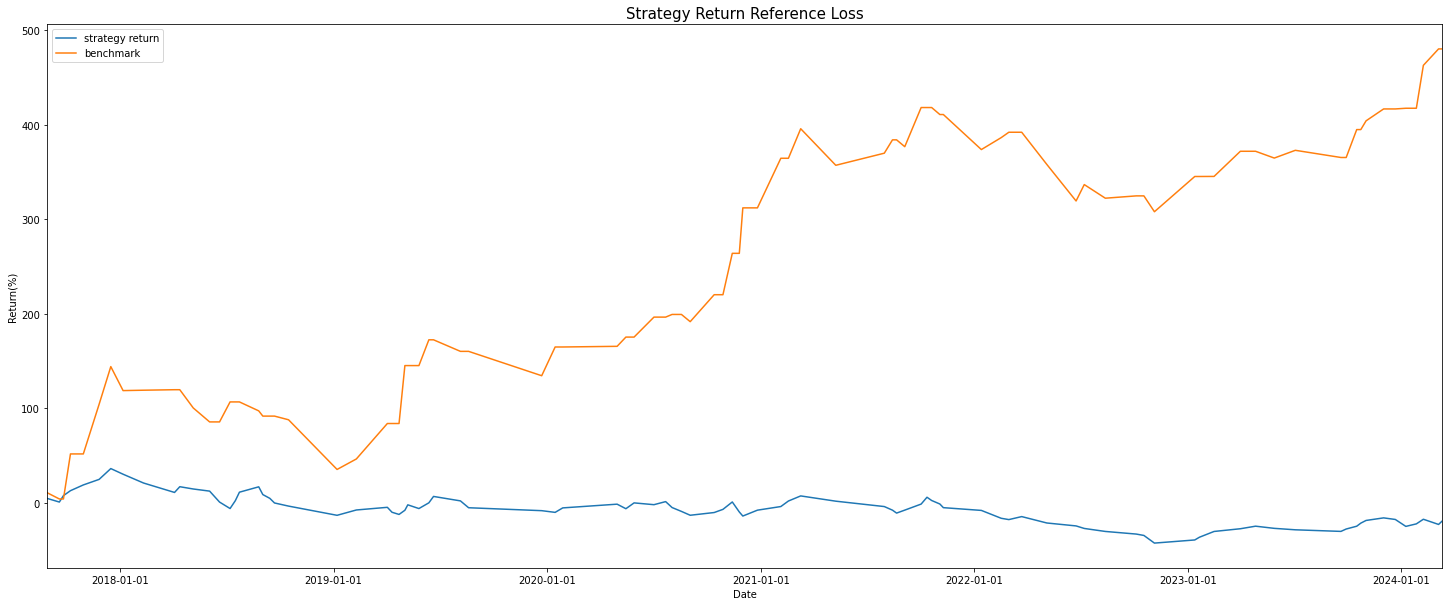

In [43]:
fig = plt.subplots(figsize=(25, 10))

plt.title('Strategy Return Reference Loss', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(result['date'], result['pl_percent'], label="strategy return")
# plt.plot(result.index, result['pl_percent'], label="strategy return")
plt.plot(result['date'], result[ticker + '_return'], label="benchmark")
plt.legend()

plt.xlim(result['date'].min(), result['date'].max())
# plt.xlim(result.index.min(), result.index.max())
ticks = ['2018-01-01', '2019-01-01', '2020-01-01', '2021-01-01', '2022-01-01', '2023-01-01', '2024-01-01']
plt.xticks(ticks)

In [44]:
# df_pls.tail(50)
# df_pls.head(50)

In [45]:
# x = strategy.file_name
# # x.head(50)
# x = x.loc['2017-10-02': '2024-03-11']
# x.tail(50)

In [46]:
# x = x[x['buyORsell']==1]
# x

In [47]:
# len(x)

In [48]:
# win = 0
# loss = 0
# for i in strategy.stockAccount.get_pls():
#     if i['pl_percent'] > 0:
#         win += 1
#     else:
#         loss += 1

# print(win)
# print(loss)
# print((win / loss) * 100)